# Customer Segmentation with K-Means Iris Data

### Import Required Libraries 

In [23]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

### Load CSV

In [11]:
iris_df = pd.read_csv('Unit06 iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Pre-processing

The k-means algorithm relies on the Euclidean distance, making it unsuitable for categorical variables due to their discrete nature. The absence of a meaningful distance measure for categories can lead to inaccurate clustering. To address this, it is recommended to exclude categorical variables from the k-means analysis, in this case 'species'. This ensures the algorithm focuses on numerical features with a well-defined distance concept, optimising the clustering process for more meaningful results. If categorical information is essential, alternative clustering algorithms designed for such data may be explored.

In [12]:
#Remove Categorical Columns
num_df = iris_df.drop('species', axis = 1)
num_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Normalizing over the standard deviation

Normalization is a crucial step in preparing a dataset for mathematical-based algorithms. The process involves scaling features to have a consistent scale, making it easier for algorithms to interpret variables with different magnitudes and distributions. In other words, normalization ensures that each feature contributes equally to the model, preventing variables with larger scales from disproportionately influencing the algorithm. In this example, the standardScaler() function is employed to normalise the dataset by scaling the features based on their standard deviation. This standardisation simplifies the mathematical computations for algorithms, enhancing their performance and accuracy in handling diverse feature magnitudes and distributions.

In [13]:
#The first column is excluded as it contains the target variable or an identifier and the remaining columns are the features.
X = num_df.values[:,1:]
#Replace any NaN with 0. This ensures numerical stability in subsequent calculations, 
#especially using algorithms that cannot handle missing values.
X = np.nan_to_num(X)
#The fit_transform method calculates the mean and standard deviation of each feature and scales the data accordingly. 
#This process ensures that the features have a mean of 0 and a standard deviation of 1, 
#making them comparable and avoiding issues related to differences in magnitudes.
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.03205722e+00, -1.34127240e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.31297673e+00],
       [ 3.37848329e-01, -1.39813811e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.31297673e+00],
       [ 1.26346019e+00, -1.34127240e+00, -1.31297673e+00],
       [ 1.95766909e+00, -1.17067529e+00, -1.05003079e+00],
       [ 8.00654259e-01, -1.34127240e+00, -1.18150376e+00],
       [ 8.00654259e-01, -1.28440670e+00, -1.31297673e+00],
       [-3.56360566e-01, -1.34127240e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.44444970e+00],
       [ 1.49486315e+00, -1.28440670e+00, -1.31297673e+00],
       [ 8.00654259e-01, -1.22754100e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.44444970e+00],
       [-1.24957601e-01, -1.51186952e+00, -1.44444970e+00],
       [ 2.18907205e+00, -1.45500381e+00, -1.31297673e+00],
       [ 3.11468391e+00, -1.28440670e+00, -1.05003079e+00],
       [ 1.95766909e+00, -1.39813811e+00

### Modeling

In [14]:
#Choose number of Clusters
clusterNum = 3
# n_clusters =Specified number of clusters, init = nitialization method (init="k-means++"). 
# n_init controls the number of times the algorithm will be run with different centroid seeds to find the best group.
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
#The fit method involves iteratively assigning data points to clusters and updating the cluster centroids until convergence.
k_means.fit(X)
#Each data point is assigned to one of the specified clusters (0, 1, or 2 in this case).
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


# Insights

In [18]:
#Assign label to each row in the df
iris_df["Clus_km"] = labels
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,Clus_km
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [16]:
#Check centroid values by finding the mean of each cluster
num_df.groupby('Clus_km').mean()

,sepal_length,sepal_width,petal_length,petal_width
Clus_km,,,,
0,5.006000,3.418000,1.464000,0.244000
1,6.653191,3.004255,5.610638,2.042553
2,5.915094,2.754717,4.281132,1.350943


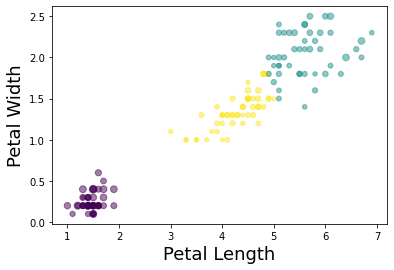

In [21]:
#Distribution of iris based on their petal length and width
area = np.pi * (X[:, 0])**2  
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

plt.show()

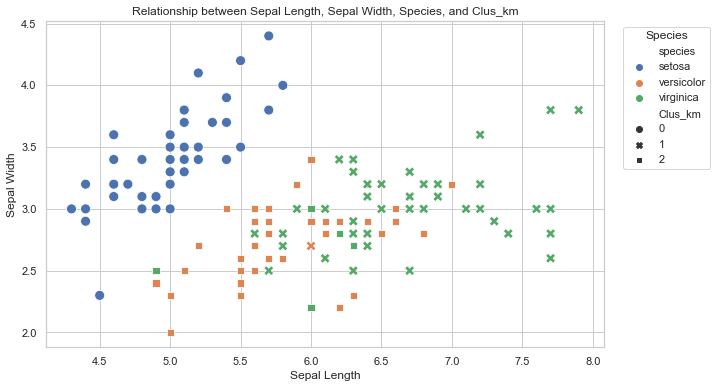

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', style='Clus_km', data=iris_df,  s=100)

# Set plot labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Relationship between Sepal Length, Sepal Width, Species, and Clus_km')

# Display the legend
plt.legend(title='Species', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()


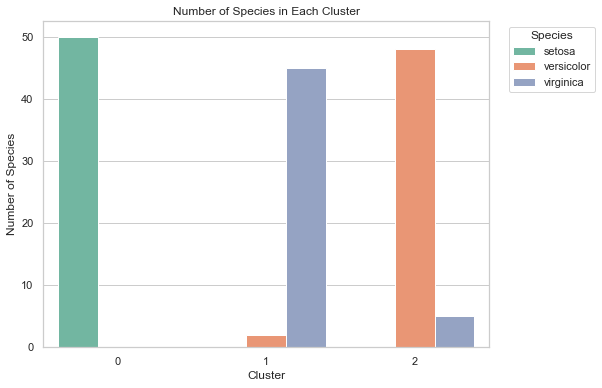

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Clus_km', hue='species', data=iris_df, palette='Set2')

# Set plot labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Species')
plt.title('Number of Species in Each Cluster')

# Display the legend
plt.legend(title='Species', loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


The two graphs show that the clusters have almost perfectly clustered the flowers based on which species of iris they belong to, the only exceptions being a small number (<5) of virginica and versicolor irises being placed in different clusters.
This implys that each species of iris can be identified based on charateristics such as petal length/width.